In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

### IMPORTING DATASET

In [3]:
dataset = pd.read_csv("heart_disease_dataset.csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
0,67,1,2,111,536,0,2,88,0,1.3,3,2,3,1,0,23.4,0
1,57,1,3,109,107,0,2,119,0,5.4,2,0,3,0,1,35.4,0
2,43,1,4,171,508,0,1,113,0,3.7,3,0,7,1,1,29.9,0
3,71,0,4,90,523,0,2,152,0,4.7,2,1,3,1,0,15.2,1
4,36,1,2,119,131,0,2,128,0,5.9,3,1,3,1,0,16.7,1


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            3069 non-null   int64  
 1   sex            3069 non-null   int64  
 2   cp             3069 non-null   int64  
 3   trestbps       3069 non-null   int64  
 4   chol           3069 non-null   int64  
 5   fbs            3069 non-null   int64  
 6   restecg        3069 non-null   int64  
 7   thalach        3069 non-null   int64  
 8   exang          3069 non-null   int64  
 9   oldpeak        3069 non-null   float64
 10  slope          3069 non-null   int64  
 11  ca             3069 non-null   int64  
 12  thal           3069 non-null   int64  
 13  smoking        3069 non-null   int64  
 14  diabetes       3069 non-null   int64  
 15  bmi            3069 non-null   float64
 16  heart_disease  3069 non-null   int64  
dtypes: float64(2), int64(15)
memory usage: 407.7 KB


In [10]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
count,3069.00000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000
mean,52.50114,0.555556,2.489736,145.306289,347.219941,0.145650,1.004236,135.157380,0.176279,3.189052,2.023786,0.626588,4.544477,0.348974,0.193874,27.496839,0.403715
std,13.70752,0.496985,1.110417,31.602321,146.853319,0.352813,0.812016,43.353197,0.381119,1.802815,0.817679,0.891447,1.751064,0.476723,0.395396,7.281731,0.490721
min,29.00000,0.000000,1.000000,90.000000,100.000000,0.000000,0.000000,60.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,15.000000,0.000000
25%,41.00000,0.000000,2.000000,118.000000,215.000000,0.000000,0.000000,98.000000,0.000000,1.600000,1.000000,0.000000,3.000000,0.000000,0.000000,21.300000,0.000000
50%,53.00000,1.000000,2.000000,146.000000,350.000000,0.000000,1.000000,135.000000,0.000000,3.200000,2.000000,0.000000,3.000000,0.000000,0.000000,27.400000,0.000000
75%,64.00000,1.000000,3.000000,172.000000,475.000000,0.000000,2.000000,172.000000,0.000000,4.700000,3.000000,1.000000,6.000000,1.000000,0.000000,33.900000,1.000000
max,76.00000,1.000000,4.000000,200.000000,600.000000,1.000000,2.000000,210.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000,1.000000,40.000000,1.000000


In [12]:
dataset.isnull().sum()

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
smoking          0
diabetes         0
bmi              0
heart_disease    0
dtype: int64

In [14]:
dataset.duplicated().sum()

0

In [16]:
dataset.shape

(3069, 17)

In [18]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'smoking', 'diabetes', 'bmi',
       'heart_disease'],
      dtype='object')

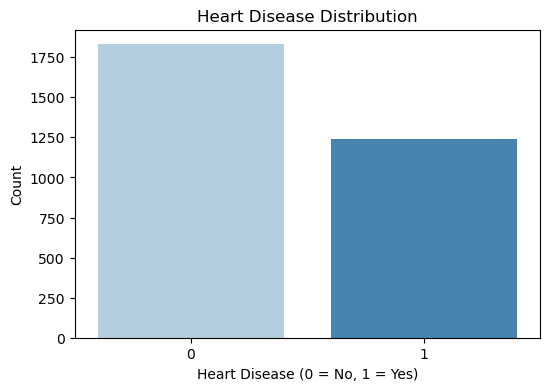

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(data=dataset, x="heart_disease", palette="Blues")
plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

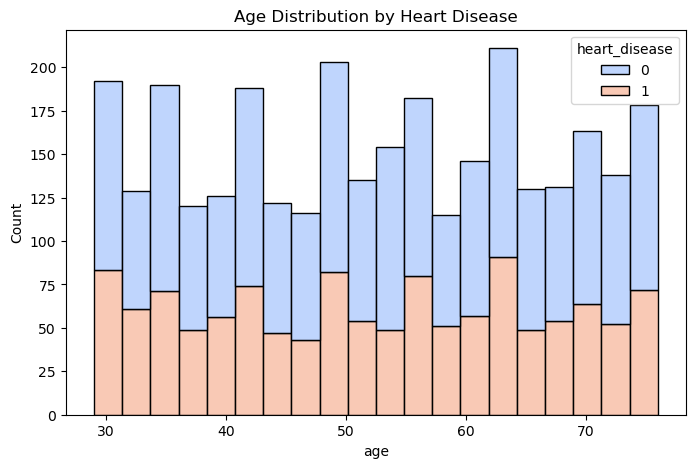

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(data=dataset, x="age", hue="heart_disease", multiple="stack", bins=20, palette="coolwarm")
plt.title("Age Distribution by Heart Disease")
plt.show()

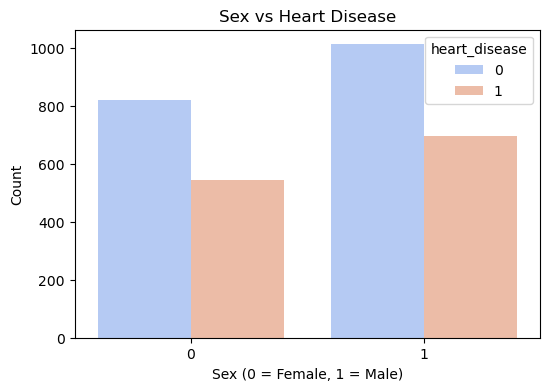

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(data=dataset, x="sex", hue="heart_disease", palette="coolwarm")
plt.title("Sex vs Heart Disease")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()

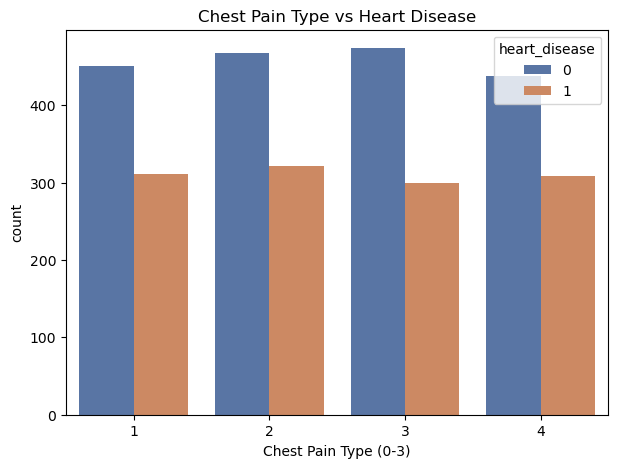

In [26]:
plt.figure(figsize=(7,5))
sns.countplot(data=dataset, x="cp", hue="heart_disease", palette="deep")
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type (0-3)")
plt.show()

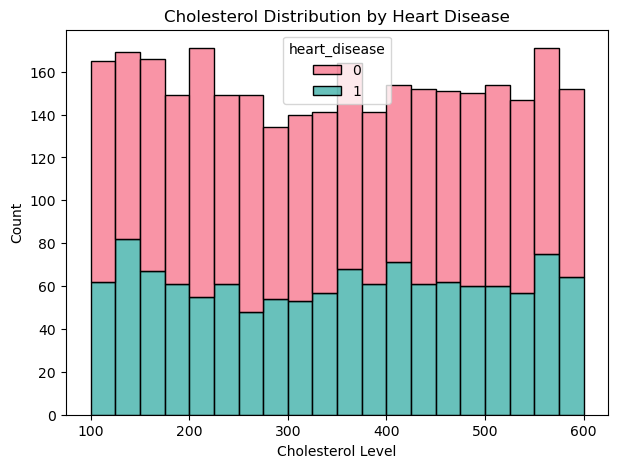

In [28]:
plt.figure(figsize=(7,5))
sns.histplot(data=dataset, x="chol", hue="heart_disease", multiple="stack", bins=20, palette="husl")
plt.title("Cholesterol Distribution by Heart Disease")
plt.xlabel("Cholesterol Level")
plt.ylabel("Count")
plt.show()


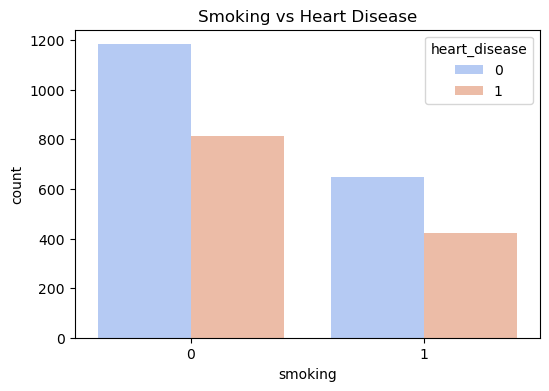

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(data=dataset, x="smoking", hue="heart_disease", palette="coolwarm")
plt.title("Smoking vs Heart Disease")
plt.show()

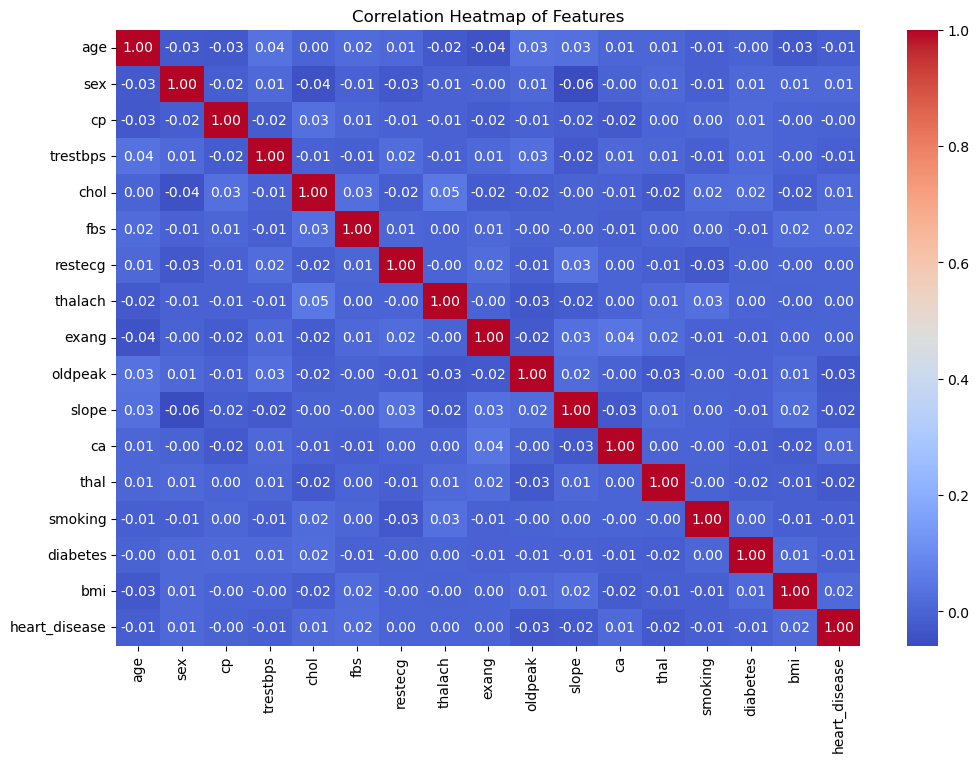

In [32]:
plt.figure(figsize=(12,8))
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

### Predictive Modelling

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [65]:


categorical_cols = ['sex','cp','restecg','slope','ca','thal','smoking','diabetes']
numeric_cols = ['age','trestbps','chol','thalach','oldpeak','bmi']

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)



In [67]:
X = dataset.drop("heart_disease" ,axis=1)
y = dataset["heart_disease"]

# Train and test data splitting
X_train , X_test, y_train , y_test = train_test_split(X,y,random_state=40,test_size=0.2,stratify=y)

In [69]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [71]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    results[name] = acc

C:\Users\hello\anaconda3\lib\site-packages\xgboost\training.py:183: UserWarning: [04:47:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [83]:
results_dataset = pd.DataFrame(list(results.items()), columns=["Algorithm", "Accuracy (%)"])
print(results_dataset)

             Algorithm  Accuracy (%)
0  Logistic Regression     58.957655
1        Decision Tree     49.674267
2        Random Forest     54.723127
3    Gradient Boosting     55.863192
4                  KNN     50.651466
5                  SVM     59.609121
6              XGBoost     51.954397


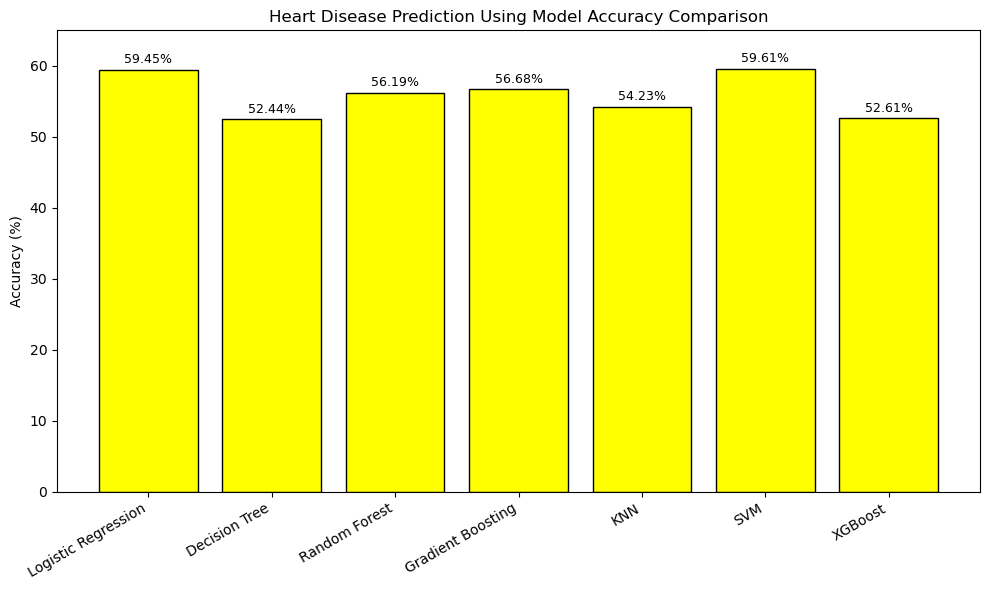

In [85]:
# Accuracy results
results_dataset = pd.DataFrame({
    "Algorithm": [ "Logistic Regression", "Decision Tree", "Random Forest",  "Gradient Boosting", "KNN", "SVM", "XGBoost"],
    "Accuracy (%)": [ 59.446254, 52.442997, 56.188925, 56.677524, 54.234528, 59.609121, 52.605863]
})

# Bar plot
plt.figure(figsize=(10,6))
bars = plt.bar(results_dataset["Algorithm"], results_dataset["Accuracy (%)"], 
               color="yellow", edgecolor="black")

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval:.2f}%", 
             ha='center', va='bottom', fontsize=9)

plt.title("Heart Disease Prediction Using Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=30, ha='right')
plt.ylim(0, 65)
plt.tight_layout()
plt.show()